In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class_x = np.array([[200.0,17.0],[120.0,5.0],[425.0,20.0],[212.0,18.0]])
class_y = np.array([1,0,0,1])

In [19]:
linear_x = np.array([
    [2104,5,1,45]
    ,[1416,3,2,40]
    ,[852,2,1,35]
    ])

linear_y = np.array([460,232,178])

# Neural Networks

![Neural Network.jpg](<attachment:Neural Network.jpg>)
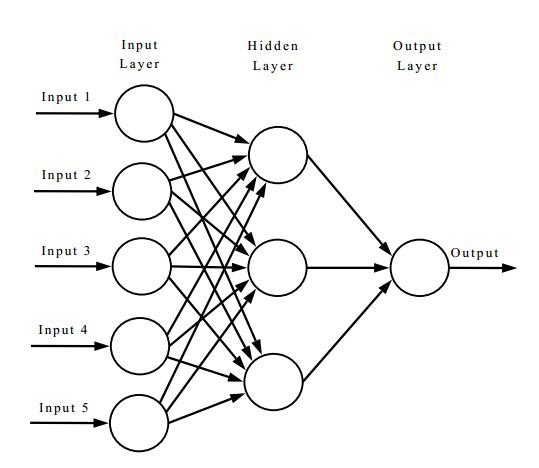

***
## Define Activation Function Where
$$
g(Z) = \frac{1}{1+e^{-(Z)}}
$$
***

In [20]:
def g(z):
    f_wb = 1/(1+np.exp(-z))
    return f_wb

***
## Activation Value of layer,unit
$$
a_{j}^{[L]} = g(\vec{w_{j}^{[L]}} \cdot \vec{a^{[L-1]}} + b_{j}^{L})
$$
>L is the number of layer


***

In [21]:
def Dense(a_in,W,b):
    units = W.shape[1]
    a_out = np.zeros(units)
    z=np.matmul(a_in,W) +b
    a_out = g(z)
    return a_out
    

***
## Loss and Cost Function 
***
$$
L(f_{(\vec{x} ,y)}) = - y log(f_{(\vec{x},y)}) - (1 - y) log(1- f_{(\vec{x},b)})
$$

>Known as Binary Cross Entropy()
***

## Gradient Descent 
***
repeat {
    $$
    w_{j}^{[L]} = w_{j}^{[L]} - a \frac{d}{dw_{j}} j(\vec{w},b)
    $$
    $$
    b_{j}^{[L]} = b_{j}^{[L]} - a \frac{d}{db_{j}} j(\vec{w},b)
    $$
}
    
$$
\frac{d}{dw_{j}} j(\vec{w},b) = \frac{1}{m} \sum\limits_{i=1}^{m}(f_{(\vec{w},b)}(\vec{x^{(i)}}) - y^{(i)} ) x_{j}^{(i)}
$$
$$
\frac{d}{db}j_{(\vec{w},b)} = \frac{1}{m} \sum\limits_{i=1}^{m}(f_{\vec{w},b}(\vec{x^{(i)}}) - y^{(i)})
$$
***

In [22]:
def Sequential(x,w1,b1,w2,b2):
    a1 = Dense(x,w1,b1)
    a2 = Dense(a1,w2,b2)
    return a2

In [23]:
def Neural_Predict(x,w1,b1,w2,b2):
    m = x.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = Sequential(x[i],w1,b1,w2,b2)
    for i in range(len(p)):
        if p[i] < 0.5:
            p[i] = 0
        else:
            p[i] = 1
    return p

## Neural Network with Regularization
***
$$
j_{(\vec{w},b)} = \frac{1}{m} \sum\limits_{i=1}^{m}L(f_{(\vec{w},b)}(\vec{x}^{{(i)}}), y^{(i)}) + \frac{\lambda}{2m} \sum\limits_{w} (w^{2})
$$
***

### Test

In [25]:
w1_temp = np.array([[-8.93, 0.29, 12.9], [-0.1,-7.32,10.82]])
b1_temp = np.array([-9.82, -9.28,0.96])
w2_temp = np.array([[-31.18],[-27.59],[-32.56]])
b2_temp = np.array([15.41])

x_tst = np.array([[200,13.9],
                  [200,17]])

y_hat_NN = Neural_Predict(class_x,w1_temp,b1_temp,w2_temp,b2_temp)
                                                                                                                                                                                                                                                                                                                                                                                                    

C:\Users\HP\AppData\Local\Temp\ipykernel_12764\858871811.py:2: RuntimeWarning: overflow encountered in exp
  f_wb = 1/(1+np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_12764\1644445113.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = Sequential(x[i],w1,b1,w2,b2)


## TensorFlow

In [52]:
#Model:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(units = 25,activation = 'sigmoid', input_shape=(2,)),
    Dense(units = 15,activation = 'sigmoid'),
    Dense(units = 2,activation = 'sigmoid')])

#loss:
from tensorflow.keras.losses import SparseCategoricalCrossentropy 
nn_model.compile(loss=SparseCategoricalCrossentropy(from_logits=True))

#fits:
nn_model.fit(class_x,class_y,epochs = 100)

#Predict:
y_hat_nn = nn_model.predict(class_x)
y_hat_nn = np.round(y_hat_nn).argmax(axis =1)

#Evaluate:
from sklearn.metrics import accuracy_score
print(accuracy_score(class_y,y_hat_nn)*100)


Epoch 1/100


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 0s 349ms/step - loss: 0.7072
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6944
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6856
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6778
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6708
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6647
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6595
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6543
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6479
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6421
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6390
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6372
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss:

## ADAM Optimizer (The Adaptive Movement Estimation algorithm):


***
$$
w_{1} = w_{1} - \alpha_{1} \frac{d}{dw_{1}}j_{(\vec{w},b)}
$$
                                                            .

                                                            .

                                                            .
$$
w_{10} = w_{10} - \alpha_{10} \frac{d}{dw_{10}}j_{(\vec{w},b)}
$$
$$
b = b -\alpha_{11} \frac{d}{db}j_{(\vec{w},b)}
$$
***

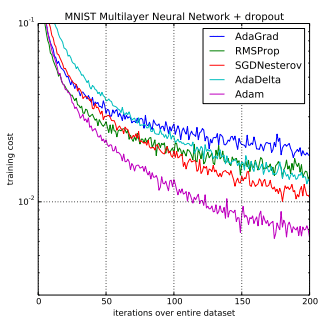

In [59]:
nn_model = Sequential([
    Dense(units = 25,activation = 'sigmoid', input_shape=(2,)),
    Dense(units = 15,activation = 'sigmoid'),
    Dense(units = 2,activation = 'sigmoid')])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=SparseCategoricalCrossentropy(from_logits=True))

nn_model.fit(class_x,class_y,epochs = 100)

y_hat_nn = nn_model.predict(class_x)
y_hat_nn = np.round(y_hat_nn).argmax(axis =1)

print(accuracy_score(class_y,y_hat_nn)*100)


Epoch 1/100
1/1 [==============================] - 0s 382ms/step - loss: 0.6818
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6792
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6772
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6757
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6746
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6738
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6731
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6725
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6718
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6710
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6701
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6691
Epoch 13/100
1/1 [==============================] - 0s 6ms/

***
***
# Softmax Regression

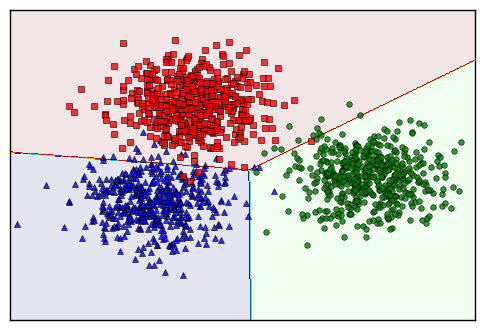

If There is 3 possible outputs 
>First output
$$ z_{1} = \vec{w}_{1} \cdot \vec{x} + b_{1}$$
$$a_{1} = \frac{e^{z_{1}}}{e^{z_{1}} + e^{z_{2}} + e^{z_{3}}}$$
>Second Output
$$ z_{2} = \vec{w}_{2} \cdot \vec{x} + b_{2}$$
$$a_{2} = \frac{e^{z_{2}}}{e^{z_{1}} + e^{z_{2}} + e^{z_{3}}}$$
>Third Output
$$ z_{3} = \vec{w}_{3} \cdot \vec{x} + b_{3}$$
$$a_{3} = \frac{e^{z_{3}}}{e^{z_{1}} + e^{z_{2}} + e^{z_{3}}}$$

***
## Cost
$$
a_{1} = \frac{e^{z_{1}}} + {e^{z_{2}} + ... + e^{z_{N}}} = p(y = 1|\vec{x})
$$
                                                            .

                                                            .

                                                            .
$$a_{N} = \frac{e^{z_{1}}} + {e^{z_{2}} + ... + e^{z_{N}}} = p(y = N|\vec{x})

***
## loss 
$$
loss(a_{1},...,a_{N},y) = 
$$
$$-log(a_{1})$$ 
                                                                        if y = 1
$$-log(a_{2})$$ 
                                                                        if y = 2
                                                                    .
                                                                    .
                                                                    .
$$-log(a_{N})$$ 
                                                                        if y = N

***
## Neural Network with softmax

![NN with softmax.webp](<attachment:NN with softmax.webp>)
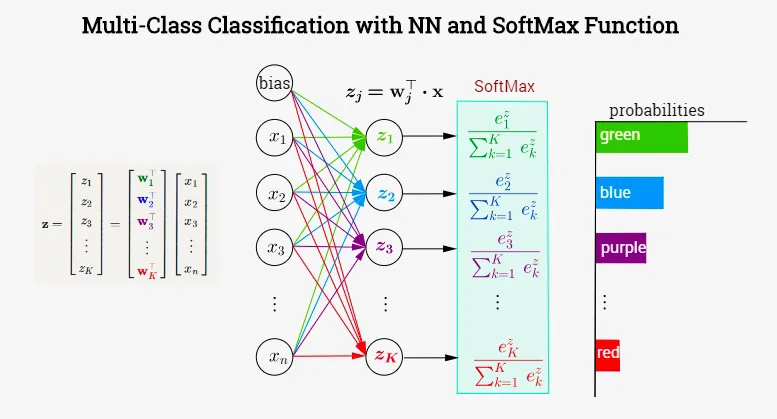

In [62]:
nn_model = Sequential([
    Dense(units = 25,activation = 'sigmoid', input_shape=(2,)),
    Dense(units = 15,activation = 'sigmoid'),
    Dense(units = 2,activation = 'softmax')])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=SparseCategoricalCrossentropy(from_logits=True))

nn_model.fit(class_x,class_y,epochs = 100)

y_hat_nn = nn_model.predict(class_x)
y_hat_nn = np.round(y_hat_nn).argmax(axis =1)

print(accuracy_score(class_y,y_hat_nn)*100)

Epoch 1/100


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 0s 368ms/step - loss: 0.6862
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6846
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6832
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6822
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6814
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6810
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6806
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6804
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6801
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6797
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6793
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6787
Epoch 13/100
1/1 [==============================] - 0s 4ms/step - loss:

***
***

# ReLU Regression (Rectified Linear Unit)

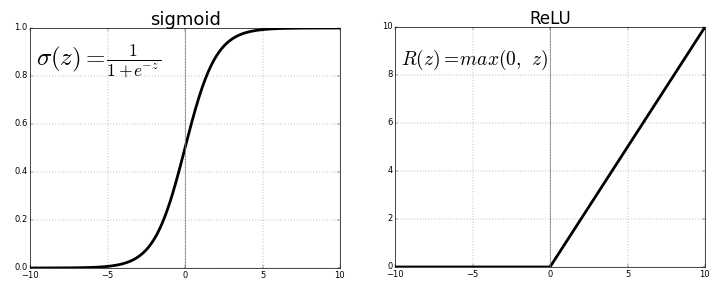

$$ g(z) = max(0,z)$$
>ReLU is the most activation function used in hidden layers

In [64]:
nn_model = Sequential([
    Dense(units = 25,activation = 'relu', input_shape=(2,)),
    Dense(units = 15,activation = 'relu'),
    Dense(units = 2,activation = 'softmax')])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=SparseCategoricalCrossentropy(from_logits=True))

nn_model.fit(class_x,class_y,epochs = 100)

y_hat_nn = nn_model.predict(class_x)
y_hat_nn = np.round(y_hat_nn).argmax(axis =1)

print(accuracy_score(class_y,y_hat_nn)*100)

Epoch 1/100


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 0s 365ms/step - loss: 27.3645
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 25.8303
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 24.3013
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 22.7775
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 21.2590
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 19.7455
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 18.2366
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 16.7322
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 15.2323
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 13.7367
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 12.2566
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7952
Epoch 13/100
1/1 [==============================] - 0s 5ms/

## Neural Network with Regularization
***
$$
j_{(\vec{w},b)} = \frac{1}{m} \sum\limits_{i=1}^{m}L(f_{(\vec{w},b)}(\vec{x}^{{(i)}}), y^{(i)}) + \frac{\lambda}{2m} \sum\limits_{w} (w^{2})
$$
***

In [66]:
from tensorflow.keras import regularizers
nn_model = Sequential([
    Dense(units = 25,activation = 'relu',input_shape=(2,),kernel_regularizer = regularizers.l2(0.01)),
    Dense(units = 15,activation = 'relu',kernel_regularizer= regularizers.l2(0.01)),
    Dense(units = 2,activation = 'softmax',kernel_regularizer=regularizers.l2(0.01))])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=SparseCategoricalCrossentropy(from_logits=True))

nn_model.fit(class_x,class_y,epochs = 100)

y_hat_nn = nn_model.predict(class_x)
y_hat_nn = np.round(y_hat_nn).argmax(axis =1)

print(accuracy_score(class_y,y_hat_nn)*100)

Epoch 1/100


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 0s 398ms/step - loss: 12.6513
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6293
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 8.6074
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 6.5850
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 4.5626
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 2.6341
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 1.3208
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 2.7076
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 3.8009
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 4.1506
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 3.9310
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 3.2886
Epoch 13/100
1/1 [==============================] - 0s 4ms/step - los

***

# Decision Trees

![Decision Tree.png](<attachment:Decision Tree.png>)
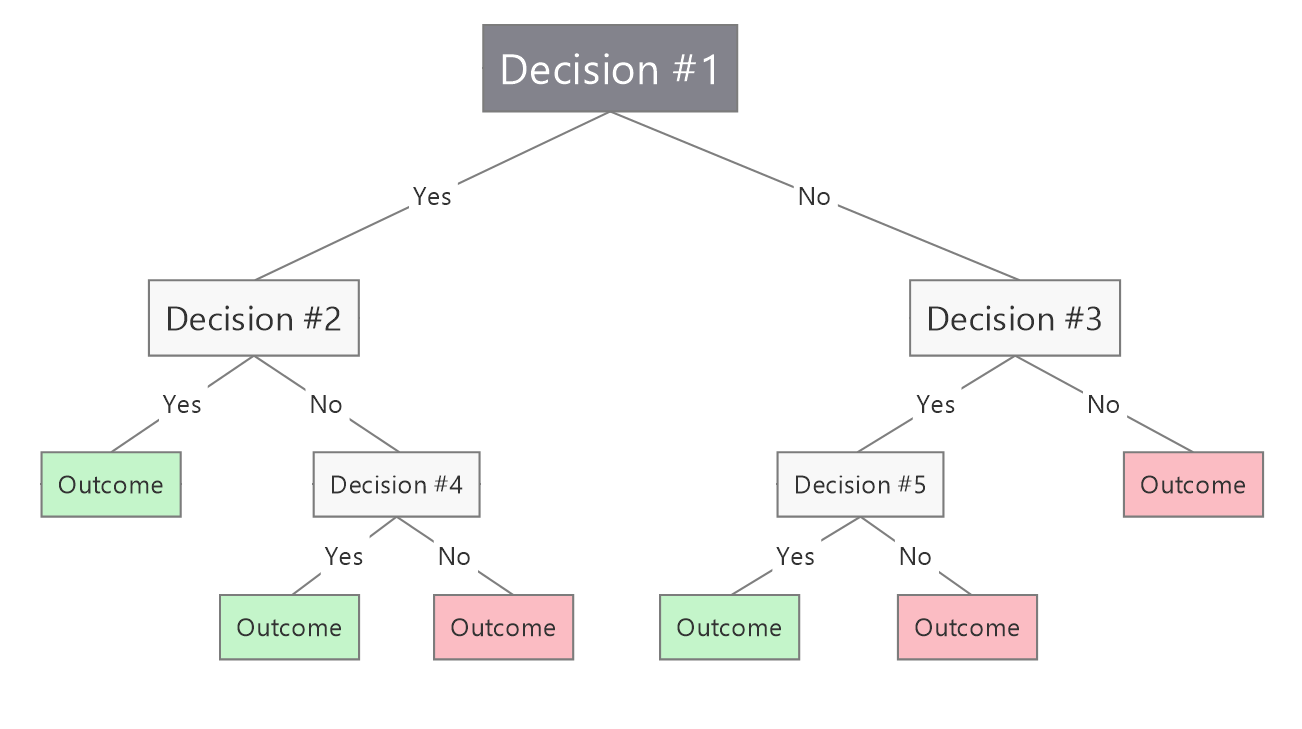

***
## Measuring Purity 
H(P) is the Entropy of P
$$p_{0} = 1- p_{1}$$
$$
H(p_{1}) = -p_{1}log_{2}(p_{1}) - (1- p_{1})log_{2}(1- p_{1})
$$
$$ 
= H(p_{1}) = -p_{1}log_{2}(p_{1}) - (1- p_{1})log_{2}(1- p_{1})
$$
Note:$$0log(0) = 0$$

![Decision Tree entropy.png](<attachment:Decision Tree entropy.png>)
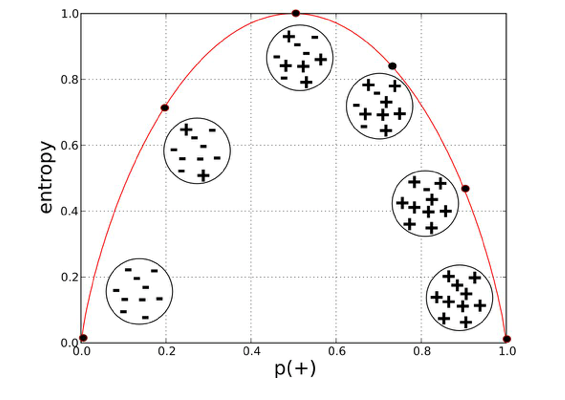

In [69]:
X_tree = np.array([
 [1, 1, 1],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_tree = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [70]:
def entropy(p):
    if p == 0 or p==1:
        return 0
    else:
        return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [74]:
def splitting_indicies(X,index_feature):
    left_indicies = []
    right_indicies = []
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indicies.append(i)
        else:
            right_indicies.append(i)
    return left_indicies,right_indicies

***
## Weighted Entropy
$$
WE= (w^{left}H(p_{1}^{left}) + w^{right} H(p_{1}^{right}))
$$
***
***

In [75]:
def weightrd_entroby(X,y,left_indicies,right_indicies):
    w_left = len(left_indicies) / len(X)
    w_right = len(right_indicies) / len(X)
    p_left = sum(y[left_indicies]) / len(left_indicies)
    p_right = sum(y[right_indicies]) / len(right_indicies)
    Weightrd_Entroby = w_left * entropy(p_left) + w_right * entropy(p_right)
    return Weightrd_Entroby

***
## Inforamtion Gain

 $$= H(p_{1}^{root}) - WE$$

In [76]:
def information_gain(X,y,right_indicies,left_indicies):
    p_root = sum(y) / len(y)
    h_p_root = entropy(p_root)
    w_entropy = weightrd_entroby(X,y,left_indicies,right_indicies)
    return h_p_root - w_entropy


***
## Test

In [77]:
for i,feature in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indicies,right_indicies = splitting_indicies(X_tree,i)
    i_gain = information_gain(X_tree,y_tree,right_indicies,left_indicies)
    print(f"Feature: {feature}, information gain if we split the root node using this feature: {i_gain:.2f}")

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


***
## Scikit-learn

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_tree,y_tree)

y_tree_hat = dtc.predict(X_tree)
print(accuracy_score(y_tree,y_tree_hat)*100)

100.0


***
***

# Trees Ensembles

### 1) Random Forest

![Tree Ensembles.png](<attachment:Tree Ensembles.png>)
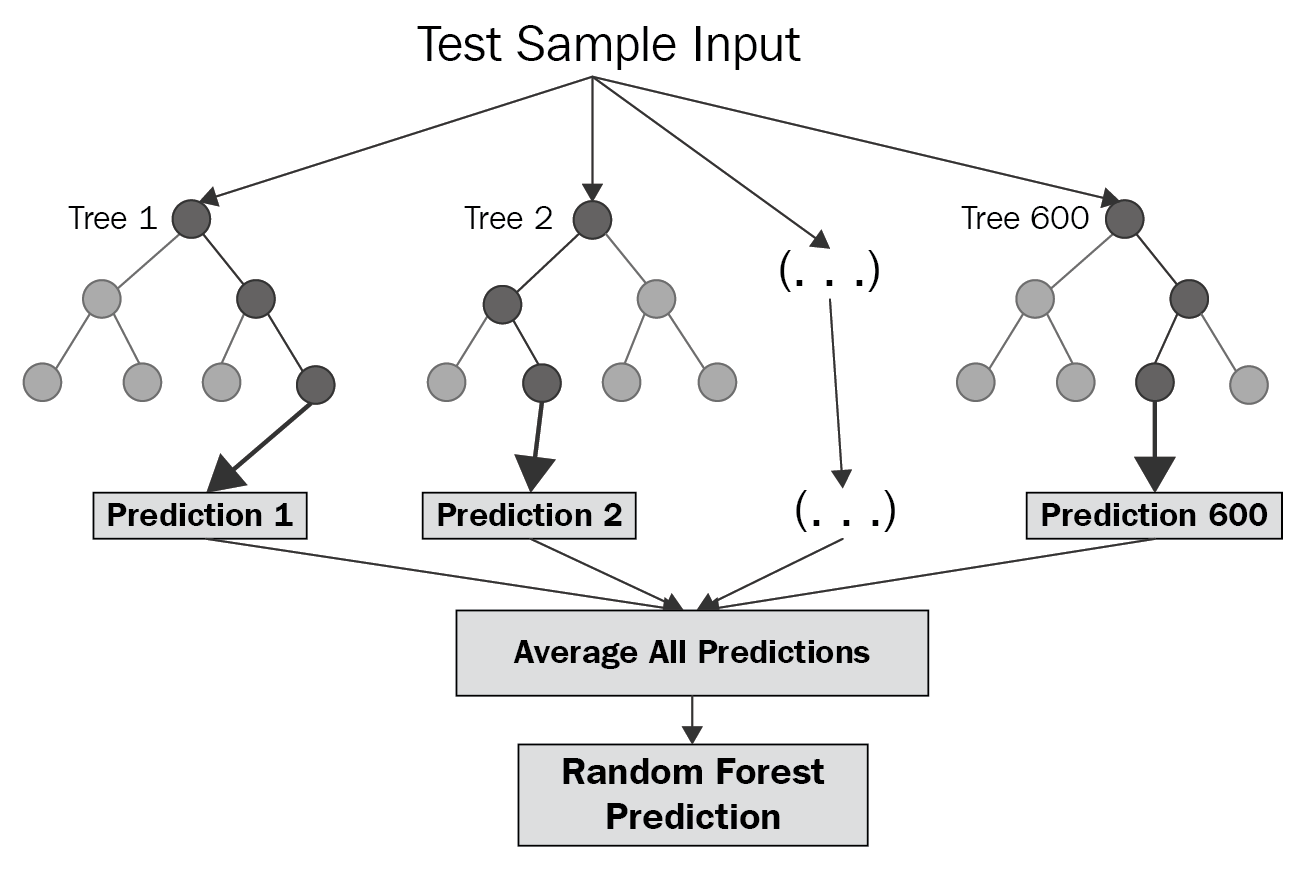

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_tree,y_tree)

y_tree_hat = rfc.predict(X_tree)
print(accuracy_score(y_tree,y_tree_hat)*100)

100.0


***
***
# XGBoost (Xtreme Gradient Boosting)

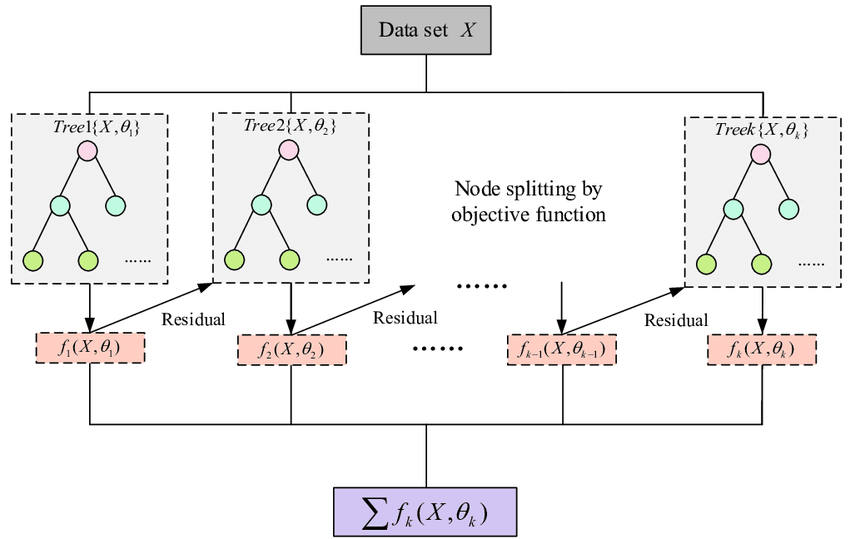

In [84]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()
XGB_model.fit(X_tree,y_tree)

XGB_y_hat = XGB_model.predict(X_tree)

print(accuracy_score(y_tree,XGB_y_hat)*100)

80.0


*****
********

# Additional Concepts

***
## One Hot Encoding

In [6]:
import pandas as pd
data = pd.DataFrame({
    'Name' : ['Youssef','Karim','Mohammed'],
    'City' : ['Suez','Alex','Cairo']
})
data


,Name,City
0,Youssef,Suez
1,Karim,Alex
2,Mohammed,Cairo


In [7]:
one_hot_encoded_data = pd.get_dummies(data,columns=['Name','City'])
one_hot_encoded_data

,Name_Karim,Name_Mohammed,Name_Youssef,City_Alex,City_Cairo,City_Suez
0,False,False,True,False,False,True
1,True,False,False,True,False,False
2,False,True,False,False,True,False


In [11]:
one_hot_encoded_data= one_hot_encoded_data.astype(int)
one_hot_encoded_data

,Name_Karim,Name_Mohammed,Name_Youssef,City_Alex,City_Cairo,City_Suez
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,1,0,0,1,0
